In [ ]:
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
%matplotlib inline

import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense, Activation, Input

import os

In [4]:
# загрузка всего датасет MNIST


# запись в переменные нужных нам частей
(x, y), (x1 , y1) = mnist.load_data()

Вариант 1. Срез

In [5]:
x_train = x[:48000]
x_val   = x[48000:54000]
x_test  = x[54000:]

print('Тренировочная выборка (изображения):', x_train.shape)
print('Проверочная выборка   (изображения):', x_val.shape)
print('Контрольная выборка   (изображения):', x_test.shape)

Тренировочная выборка (изображения): (48000, 28, 28)
Проверочная выборка   (изображения): (6000, 28, 28)
Контрольная выборка   (изображения): (6000, 28, 28)


In [6]:
y_train = y[:48000]
y_val   = y[48000:54000]
y_test  = y[54000:]

print('Тренировочная выборка (метки):', y_train.shape)
print('Проверочная выборка   (метки):', y_val.shape)
print('Контрольная выборка   (метки):', y_test.shape)

Тренировочная выборка (метки): (48000,)
Проверочная выборка   (метки): (6000,)
Контрольная выборка   (метки): (6000,)


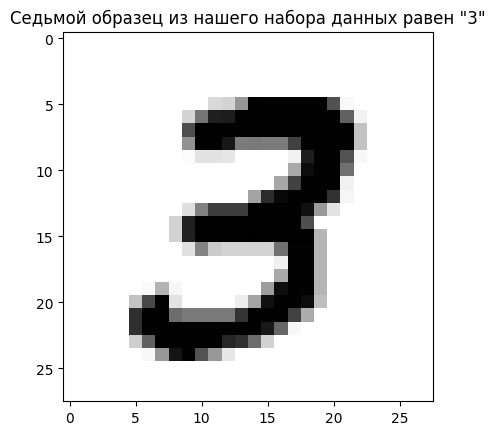

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

digit = x_train[7]
fig, ax = plt.subplots(1,1)
ax.set_title(f'Седьмой образец из нашего набора данных равен "{y_train[7]}"')
ax.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [8]:
import random
import numpy as np

# Процент, который выделяем в тестовую выборку
split_test = 0.2

# Процент, который выделяем в проверочную выборку
split_val = 0.2

# Список из случайных значений от 0 до 1, длиной равной х
mask_list = np.random.sample(x.shape[0])

# Создаём маску True-False для создания проверочной выборки
# Проведем над нашим списком логические операции
mask_test = mask_list >= 1 - split_test # все элементы списка большие или равные 0.8 преобразуются в True, остальные в False

# все элементы списка меньшие 0.6 преобразуются в True, остальные в False
mask_train = (1 - split_test - split_val) > mask_list

# все оставшиеся элементы списка True, вошедшие в mask_test или mask_train - устанавливаем в False
# `~` - означает инверсию, логическое НЕ. Где было False станет True и наоборот
# `|` - логическое ИЛИ, объединяет все True в обоих списках, сохраняя длину списка.
mask_val = ~(mask_test | mask_train) #


print(f'Длина тренировочной выборки: {len(x[mask_train])}')
print(f'Длина проверочной выборки: {len(x[mask_val])}')
print(f'Длина контрольной выборки: {len(x[mask_test])}')

Длина тренировочной выборки: 36035
Длина проверочной выборки: 11921
Длина контрольной выборки: 12044


In [9]:
xs = np.asarray(range(10))

In [10]:
# Процент, который выделяем в тестовую выборку
split_test = 0.2

# Процент, который выделяем в проверочную выборку
split_val = 0.2

In [11]:
# Список из случайных значений от 0 до 1, длиной равной хs
mask_list = np.random.sample(xs.shape[0])
print(mask_list)

[0.38244525 0.53627508 0.93102586 0.84999153 0.1544888  0.95344886
 0.06224798 0.08784029 0.56398335 0.89348886]


In [12]:
mask_test = mask_list >= 1 - split_test
print(mask_test)


[False False  True  True False  True False False False  True]


In [13]:
mask_train = (1 - split_test - split_val) > mask_list
print(mask_train)

[ True  True False False  True False  True  True  True False]
